# IMPORTS

In [1]:
#####################################################################
##Alle für die Bachelorarbeit benötigte Imports von anderen Paketen##
#####################################################################

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import fsolve
from scipy.optimize import minimize
from numba import njit
from tqdm import tqdm

# SUPERNOVAE DATEN

In [2]:
###########################################################
##Daten aus der Datenbank des Supernova Cosmology Project##
###########################################################

rotverschiebungen_data, magnituden_data, fehler_data = np.loadtxt('supernova.txt', usecols = (1, 2, 3), unpack = True)

# HUBBLE PARAMETER MIT VARIIERENDEM DICHTEPARAMETER

In [3]:
#############################
##Hubble Parameter Funktion##
#############################

@njit
def hubble_parameter(rotverschiebung, omega_m0, h_0):
    #H_0 Einheiten: km/(s*Mpc)
    return h_0 * np.sqrt(omega_m0 * np.power((1 + rotverschiebung), 3) + 1 - omega_m0)

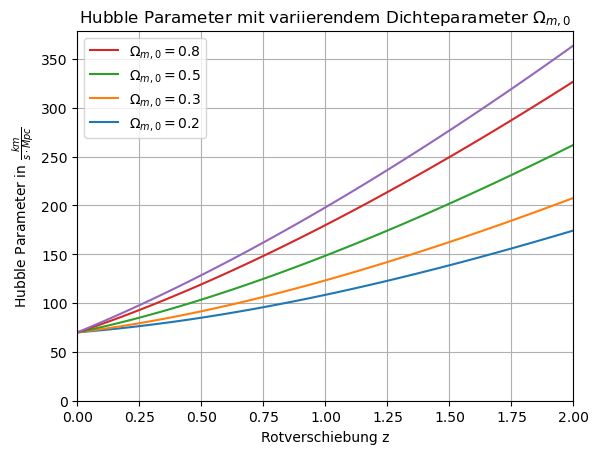

In [9]:
##############################################################
##Plot des Hubble Parameter mit variierendem Dichteparameter##
##############################################################

for omega_m0 in [0.2, 0.3, 0.5, 0.8, 1]: #Plot
    plt.plot(np.linspace(0, 2, 100), hubble_parameter(np.linspace(0, 2, 100), omega_m0, 70), label = r'$\Omega_{m,0} = $' + str(omega_m0))

#Achsenanpassung
plt.xlim(0, 2)
plt.ylim(0)

#Reihenfolge der in der Legende
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[3], handles[2], handles[1], handles[0]], [labels[3], labels[2], labels[1], labels[0]])

#Beschriftung

plt.xlabel('Rotverschiebung z')
plt.ylabel(r'Hubble Parameter in $\frac{km}{s \cdot Mpc}$')
plt.title(r'Hubble Parameter mit variierendem Dichteparameter $\Omega_{m,0}$')

plt.grid(True)

plt.show()

# LEUCHTKRAFTDISTANZ MIT VARIIERENDEM DICHTEPARAMETER

In [4]:
#################################################
##Funktionen für die Berechnung der Leuchtkraft##
#################################################

@njit
def integrand(rotverschiebung, omega_m0, h_0):
    return 1/hubble_parameter(rotverschiebung, omega_m0, h_0)

def leuchtkraftdistanz(rotverschiebung, omega_m0, h_0):
    c = 3e5 #Lichtgeschwindigkeit in km/s
    return c * (1 + rotverschiebung) * quad(integrand, 0, rotverschiebung, args = (omega_m0, h_0))[0]

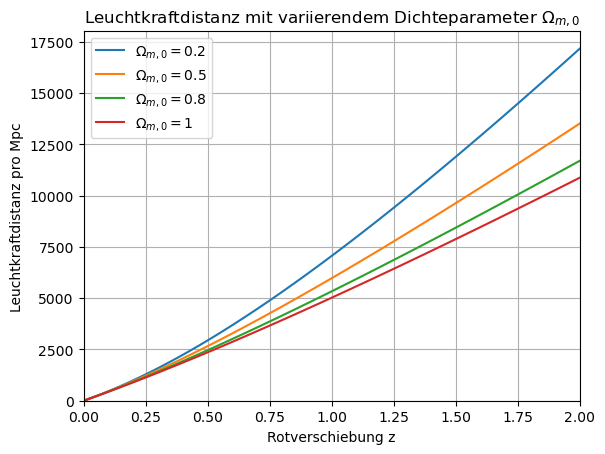

In [11]:
################################################################
##Plot der Leuchtkraftdistanz mit variierendem Dichteparameter##
################################################################

for omega_m0 in [0.2, 0.5, 0.8, 1]: #Plot
    d_L = np.array([leuchtkraftdistanz(rotverschiebung, omega_m0, 70) for rotverschiebung in np.linspace(0, 2, 100)]) #y-Werte für den Plot
    plt.plot(np.linspace(0, 2, 100), d_L, label = r'$\Omega_{m,0} = $' + str(omega_m0))

#Achsenanpassung
plt.xlim(0, 2)
plt.ylim(0)

#Beschriftung
plt.xlabel('Rotverschiebung z')
plt.ylabel(r'Leuchtkraftdistanz pro Mpc')
plt.title(r'Leuchtkraftdistanz mit variierendem Dichteparameter $\Omega_{m,0}$')

plt.legend()

plt.grid(True)

plt.show()

# RELATIVE MAGNITUDE MIT VARIIERENDEM DICHTEPARAMTER

In [5]:
#########################################
##Funktion für die relativen Magnituden##
#########################################

@njit
def m_rel_theoretisch(leuchtkraftdistanz):
    return 5 * np.log10(leuchtkraftdistanz) + 25

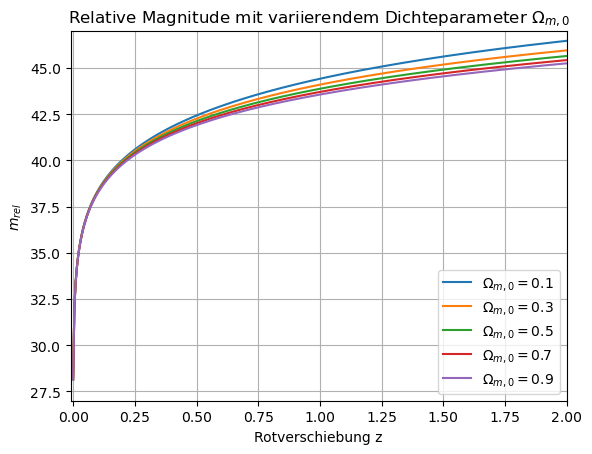

In [13]:
################################################################################
##Plot der theoretischen relativen Magnituden mit variierendem Dichteparameter##
################################################################################

for omega_m0 in [0.1, 0.3, 0.5, 0.7, 0.9]: #Plot
    d_L = np.array([leuchtkraftdistanz(rotverschiebung, omega_m0, 70) for rotverschiebung in np.linspace(0.001, 2, 400)])
    theoretischen_magnituden = np.array([m_rel_theoretisch(leuchtkraftdistanz) for leuchtkraftdistanz in d_L])
    plt.plot(np.linspace(0, 2, 400), theoretischen_magnituden, label = r'$\Omega_{m,0} = $' + str(omega_m0))

#Achsenanpassung
plt.xlim(-0.01, 2)
plt.ylim(27, 47)

#Beschriftung
plt.xlabel('Rotverschiebung z')
plt.ylabel(r'$m_{rel}$')
plt.title(r'Relative Magnitude mit variierendem Dichteparameter $\Omega_{m,0}$')

#Position der Legende
plt.legend(loc='lower right')

plt.grid(True)

plt.show()

# VERGLEICH DER THEORETISCHEN WERTEN FÜR DIE RELATIVEN MAGNITUDEN MIT DEN SUPERNOVAE DATEN

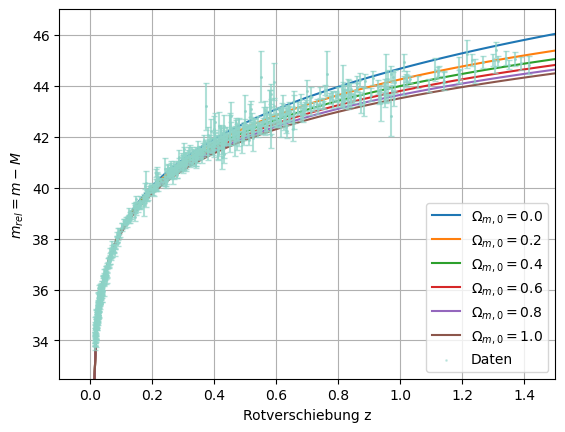

In [15]:
###############################################################################
##Plot zum Vergleich der theoretischen Werte mit den Werten aus der Datenbank##
###############################################################################

for omega_m0 in [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]: #Plot der theoretischen Werte
    d_L = np.array([leuchtkraftdistanz(rotverschiebung, omega_m0, 70) for rotverschiebung in np.linspace(0.001, 2, 100)])
    theoretischen_magnituden = np.array([m_rel_theoretisch(leuchtkraftdistanz) for leuchtkraftdistanz in d_L])
    plt.plot(np.linspace(0, 2, 100), theoretischen_magnituden, label = r'$\Omega_{m,0} = $' + str(omega_m0), zorder = 2)

#Datenpunkte
plt.scatter(rotverschiebungen_data, magnituden_data, s = 1, zorder = 3, label = r'Daten', alpha = 0.4, color = '#8dd3c7')

#Fehler der Datenpunkte
plt.errorbar(rotverschiebungen_data, magnituden_data, yerr = fehler_data, fmt = 'o', markersize = 1, capsize = 2, color = '#8dd3c7',
             linestyle = 'none', zorder = 3, alpha = 0.7)

#Anpassung der Darstellung
plt.xlim(-0.1, 1.5)
plt.ylim(32.5,47)

#Achsenbeschriftung und Titel
plt.xlabel('Rotverschiebung z')
plt.ylabel(r'$m_{rel} = m - M$')
#plt.title(r'Theoretischen relativen Magnituden mit variierendem Dichteparameter $\Omega_{m,0}$ im Vergleich mit Supernovae Daten')

plt.legend()

plt.grid(True)

plt.savefig('Theoretische Magnituden und Daten', dpi=300, bbox_inches='tight')

plt.show()

# PARAMETER BESTIMMUNG (mit Ω und H)

In [6]:
########################################################
##Definition der χ²-Funktion, wobei χ² = χ²(Ω_m0, H_0)## 
########################################################

def chi2(omega_m0, h_0): 
    chi = 0 #Wahl eines Startwertes
    d_L = np.array([leuchtkraftdistanz(rotverschiebung, omega_m0, h_0) for rotverschiebung in rotverschiebungen_data])
    for i in range(d_L.size):
        chi += ((m_rel_theoretisch(d_L[i]) - magnituden_data[i]) / fehler_data[i])**2
    return chi

In [13]:
###########################################
##Minimum der χ²-Funktion Funktion finden##
###########################################

#Startwerte
chi2_min = 1e30
omega_m0_min = 0
h_0_min = 0

for omega_m0 in np.linspace(0.2, 0.4, 50):
    for h_0 in np.linspace(65, 75, 50):
        chi2_wert = chi2(omega_m0, h_0)
        if chi2_wert < chi2_min:
            chi2_min = chi2_wert
            omega_m0_min = omega_m0
            h_0_min = h_0

In [9]:
#####################
##Ausgabe der Werte##
#####################

print('Ω_m0 = ' + str(omega_m0_min))
print('H_0 = ' + str(h_0_min))
print('χ² = ' + str(chi2_min))

Ω_m0 = 0.2771929824561404
H_0 = 70.06265664160401
χ² = 562.2278460126765


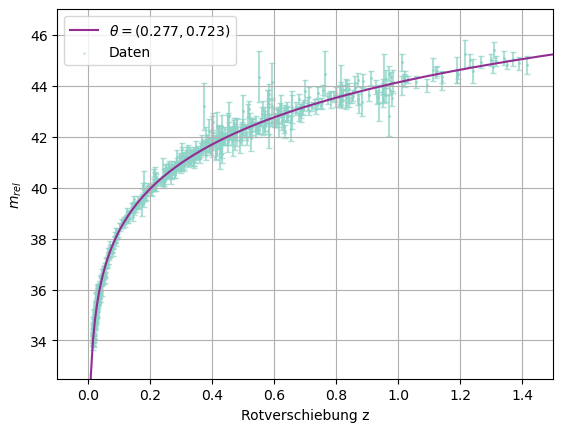

In [12]:
#####################################################################################
##Plot der relativen Magnitude mit den gefundenen Parametern im Vergleich mit Daten##
#####################################################################################

d_L = np.array([leuchtkraftdistanz(rotverschiebung, 0.277, 70.06) for rotverschiebung in np.linspace(0.001, 2, 300)])
theoretischen_magnituden = np.array([m_rel_theoretisch(leuchtkraftdistanz) for leuchtkraftdistanz in d_L])
plt.plot(np.linspace(0.001, 2, 300), theoretischen_magnituden, label = r'$\theta = (0.277, 0.723)$', zorder = 2, color = '#922d92')

#Datenpunkte
plt.scatter(rotverschiebungen_data, magnituden_data, s = 1, zorder = 1, label = r'Daten', alpha = 0.4, color = '#8dd3c7')

#Fehler der Datenpunkte
plt.errorbar(rotverschiebungen_data, magnituden_data, yerr = fehler_data, fmt = 'o', markersize = 1, capsize = 2, color = '#8dd3c7', 
             linestyle = 'none', zorder = 1, alpha = 0.7)

#Anpassung der Darstellung
plt.xlim(-0.1, 1.5)
plt.ylim(32.5,47)

#Achsenbeschriftung und Titel
plt.xlabel('Rotverschiebung z')
plt.ylabel(r'$m_{rel}$')
#plt.title(r'Relative Magnitude mit gefundenen minimalen Dichteparameter und Hubble Konstante im Vergleich mit Supernovae Daten')

plt.legend()

plt.grid(True)

plt.savefig('Plot mit gefunden Werten für Theta und H', dpi=300, bbox_inches='tight')

plt.show()

In [7]:
#########################################################################
##Werte für den Plot der Sigma Umgebungen / Fehler Umgebungen berechnen##
#########################################################################

#Leeres Array
chi2_werte = np.empty((len(np.linspace(0.2, 0.36, 100)), len(np.linspace(68, 72, 100))))

#Berechnung
for i, h_0 in enumerate(np.linspace(68, 72, 100)):
    for j, omega_m0 in enumerate(np.linspace(0.2, 0.36, 100)):
        chi2_wert = chi2(omega_m0, h_0)
        chi2_werte[i, j] = chi2_wert

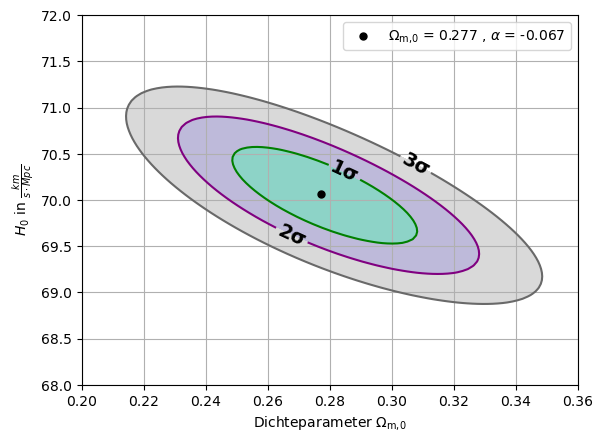

In [14]:
#################################################
##Plot der Sigma Umgebungen / Fehler Umgebungen##
#################################################

#Gitter erstellen
Omega_m0, H_0 = np.meshgrid(np.linspace(0.2, 0.36, 100), np.linspace(68, 72, 100))

#Grenzen
Grenzen = [float(chi2_min + 2.3), float(chi2_min + 6.17), float(chi2_min + 11.8)]

#Formatierung
contour_filled = plt.contourf(Omega_m0, H_0, chi2_werte, levels = Grenzen, cmap = 'Set3', extend = 'min') #Innerer Bereich
contour_lines = plt.contour(Omega_m0, H_0, chi2_werte, levels = Grenzen, colors = ['green', 'purple', 'dimgrey']) #Konturen
labels = {Grenzen[0]: '1σ', Grenzen[1]: '2σ', Grenzen[2]: '3σ'} #Beschriftung der Konturen
fmt = {level: label for level, label in labels.items()}  
contour_label = plt.clabel(contour_lines, fmt = fmt, inline = True, fontsize = 14, colors = 'black') #Schriftformatierung
for label in contour_label:
    label.set_fontweight('semibold')

#Gefundener Punkt
plt.scatter(0.277, 70.06, color = 'black', marker = '.', s = 100, label = r'$\Omega_\text{m,0}$ = 0.277 , $\alpha$ = -0.067', zorder = 2)

#Achsenbeschriftung
plt.xlabel(r'Dichteparameter $\Omega_\text{m,0}$')
plt.ylabel(r'$H_0$ in $\frac{km}{s \cdot Mpc}$')

plt.grid(True)

plt.legend()

plt.savefig('Sigma_Umgebungen', dpi=300, bbox_inches='tight')

plt.show()

# PARAMETER BESTIMMUNG (mit Ω und ohne H)

In [16]:
####################################################################
##Modifizierte Leuchtkraftdistanz, in welcher das H nicht vorkommt##
####################################################################

#Modifizierte Leuchtkraftdistanz ist alte Leuchtkraftdistanz, in welcher H = 1 gesetzt wird.

In [22]:
#######################################################
##Analytische χ²-Funktion in welcher H nicht vorkommt##
#######################################################

@njit
def chi2_analytisch(theoretische_magnituden, magnituden, fehler):
    c_1 = 0
    f_0 = 0
    f_1 = 0
    for i in range(len(rotverschiebungen_data)):
        c_1 += 1/(fehler_data[i]**2)
        f_0 += (theoretische_magnituden[i] - magnituden[i]) / fehler[i]**2
        f_1 += ((theoretische_magnituden[i] - magnituden[i]) / fehler[i])**2
    return f_1 - (f_0 ** 2) / c_1

In [20]:
################################################
##Neue χ²-Funktion in welcher H nicht vorkommt##
################################################

def chi2_neu(omega_m0):
    theoretische_magnituden = np.array([5 * np.log10(leuchtkraftdistanz(rotverschiebung, omega_m0, 1)) for rotverschiebung in rotverschiebungen_data])
    chi2_wert = chi2_analytisch(theoretische_magnituden, magnituden_data, fehler_data)
    return chi2_wert

In [33]:
###########################################
##Minimum der neuen χ²-Funktion bestimmen##
###########################################

#Startwerte
chi2_neu_min = 1e30
omega_m0_min = 0

for omega_m0 in np.linspace(0.2, 0.3, 200):
    chi2_neu_wert = chi2_neu(omega_m0)
    if chi2_neu_wert < chi2_neu_min:
        chi2_neu_min = chi2_neu_wert
        omega_m0_min = omega_m0

In [34]:
################################
##Ausgabe der gefundenen Werte##
################################

print('Ω_m0 = ' + str(omega_m0_min))
print('χ² = ' + str(chi2_neu_min))

Ω_m0 = 0.27738693467336684
χ² = 562.2267608689144


# FEHLERBESTIMMUNG DER NEUEN χ²-FUNKTION

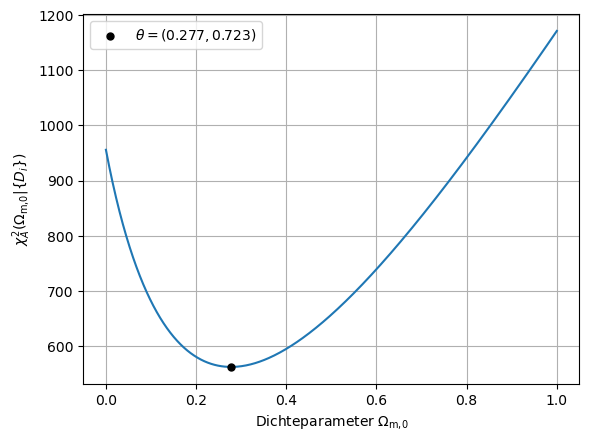

In [35]:
#################################################
##Plot der χ²-Funktion mit gefundenem Parameter##
#################################################

chi2_neu_werte = np.array([chi2_neu(omega_m0) for omega_m0 in np.linspace(0, 1, 400)]) #y-Werte berechnen
plt.plot(np.linspace(0, 1, 400), chi2_neu_werte)

#Beschriftung
plt.xlabel(r'Dichteparameter $\Omega_\text{m,0}$')
plt.ylabel(r'$\chi^2_A (\Omega_{\text{m,0}} | \{D_i\})$')

plt.grid(True)

#Gefundener Punkt
plt.scatter(0.277, chi2_neu_min, color = 'black', marker = '.', s = 100, 
            label = r'$\theta = (0.277, 0.723)$', zorder = 2)

plt.legend()

plt.savefig('Chi Quadrat', dpi=300, bbox_inches='tight')

plt.show()

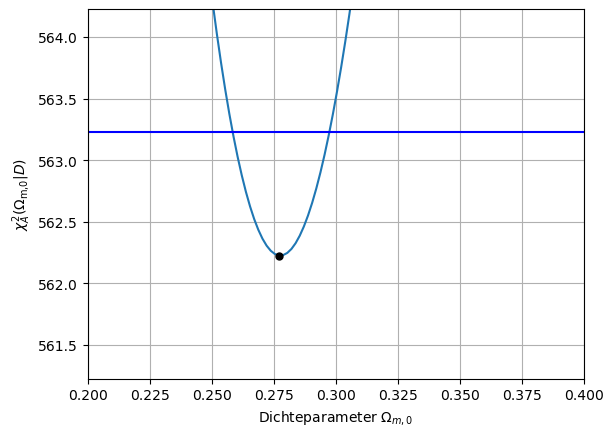

In [37]:
#############################################################################################################
##Plot der χ²-Funktion mit Gerade, welche um den Wert 1 nach oben verschoben wurde, um Grenzen abzuschätzen##
#############################################################################################################

chi2_neu_werte = np.array([chi2_neu(omega_m0) for omega_m0 in np.linspace(0, 1, 600)]) #y-Werte berechnen
plt.plot(np.linspace(0, 1, 600), chi2_neu_werte)
plt.plot(np.linspace(0, 1, 600), np.full_like(np.linspace(0, 1, 600), chi2_neu_min + 1), color = 'blue')

#Anpassung der Darstellung
plt.xlim(0.2, 0.4)
plt.ylim(chi2_neu_min - 1, chi2_neu_min + 2)

#Beschriftung
plt.xlabel(r'Dichteparameter $\Omega_{m,0}$')
plt.ylabel(r'$\chi^2_A (\Omega_\text{m,0} | D)$')

plt.scatter(0.277, chi2_neu_min, color = 'black', marker = '.', s = 100, 
            label = r'$\theta = (0.277, 0.723)$', zorder = 2)

plt.grid(True)

plt.show()

In [39]:
####################
##Fehlerbestimmung##
####################

def delta_chi2(omega_m0):
    return chi2_neu(omega_m0) - (chi2_neu_min + 1)

omega_min = fsolve(delta_chi2, 0.26)[0]
omega_max = fsolve(delta_chi2, 0.3)[0]

print('Ω_m0_min = ' + str(omega_min))
print('Ω_m0_max = ' + str(omega_max))

print('\nΩ_m0_max - Ω_m0_best = ' + str(omega_max - 0.28) + ' | Oberer Fehler: 0.018')
print('Ω_m0_best - Ω_m0_min = ' + str(0.28 - omega_min) + ' | Unterer Fehler: 0.021')

Ω_m0_min = 0.2584533173189771
Ω_m0_max = 0.29740854343520234

Ω_m0_max - Ω_m0_best = 0.017408543435202317 | Oberer Fehler: 0.018
Ω_m0_best - Ω_m0_min = 0.021546682681022944 | Unterer Fehler: 0.021


# --------------------------------------------------------------------------------------------

# ZUSATZ: LIKELIHOOD PLOTS

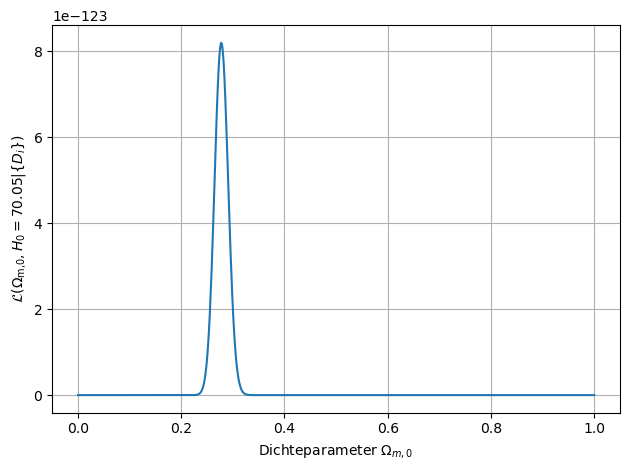

In [67]:
#######################
##Likelihood-Funktion##
#######################

def likelihood(omega_m0, h_0):
    return np.exp(-0.5 * chi2(omega_m0, h_0))

#############################################################
##Plot der Likelihood Funktion mit bestem Parameter für H_0##
#############################################################

likelihood_werte = np.array([likelihood(omega_m0, 70.05) for omega_m0 in np.linspace(0, 1, 600)]) #y-Werte berechnen
plt.plot(np.linspace(0, 1, 600), likelihood_werte)

#Beschriftung
plt.xlabel(r'Dichteparameter $\Omega_{m,0}$')
plt.ylabel(r'$\mathcal{L}(\Omega_{\text{m,0}}, H_0 = 70.05|\{D_i\})$')

plt.grid(True)

plt.tight_layout()

plt.show()

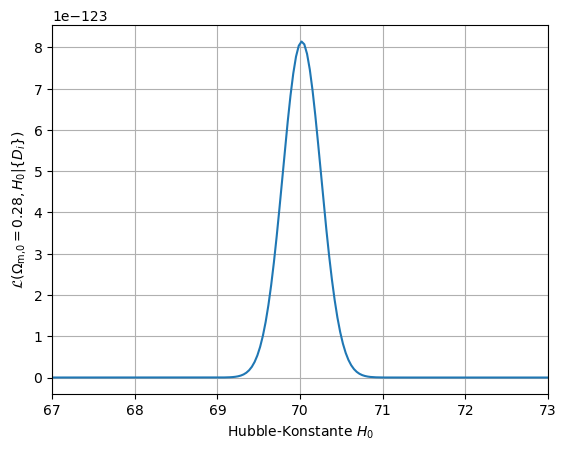

In [68]:
##################################################################
##Plot der Likelihood Funktion mit bestem Parameter für Omega_m0##
##################################################################

likelihood_werte = np.array([likelihood(0.28, h_0) for h_0 in np.linspace(60, 80, 600)]) #y-Werte berechnen
plt.plot(np.linspace(60, 80, 600), likelihood_werte)


#Beschriftung
plt.xlabel(r'Hubble-Konstante $H_0$')
plt.ylabel(r'$\mathcal{L}(\Omega_{\text{m,0}} = 0.28, H_0|\{D_i\})$')

plt.xlim(67, 73)

plt.grid(True)

plt.show()

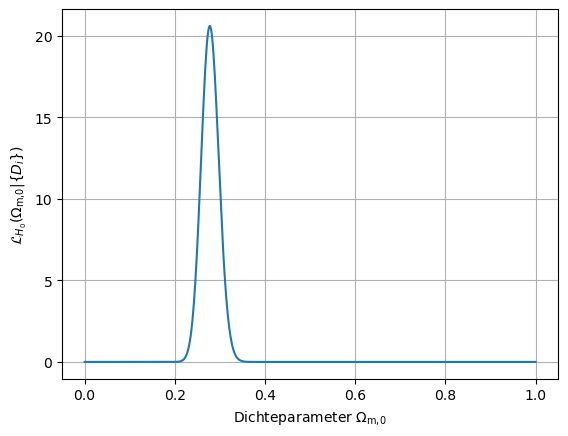

In [72]:
#######################################
##Marginalisierte Likelihood-Funktion##
#######################################

def likelihood_marginalized(omega_m0):
    integrand = lambda h0: np.exp(-0.5 * chi2(omega_m0, h0))
    result, _ = quad(integrand, 68, 72)
    return result

L_0_marginalized, _ = quad(likelihood_marginalized, 0, 1) #Normierungskonstante

#################################################
##Plot der marginalisierten Likelihood-Funktion##
#################################################

likelihood_werte = np.array([likelihood_marginalized(omega_m0)/L_0_marginalized for omega_m0 in np.linspace(0, 1, 600)]) #y-Werte berechnen
plt.plot(np.linspace(0, 1, 600), likelihood_werte)

#Beschriftung
plt.xlabel(r'Dichteparameter $\Omega_{\text{m,0}}$')
plt.ylabel(r'$\mathcal{L}_{H_0}(\Omega_{\text{m,0}} |\{D_i\})$')

plt.grid(True)

plt.savefig('Marginalisierte Likelihood', dpi=300, bbox_inches='tight')

plt.show()

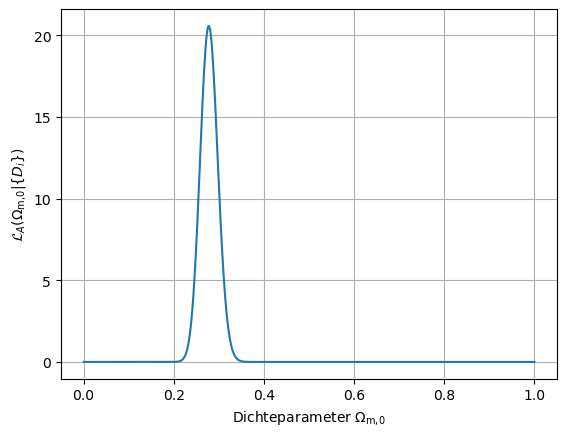

In [73]:
###################################
##Analytische Likelihood-Funktion##
###################################

def likelihood_analytic(omega_m0):
    return np.exp(-0.5 * chi2_neu(omega_m0))

L_0,_ = quad(likelihood_analytic, 0, 1)

#############################################
##Plot der analytischen Likelihood-Funktion##
#############################################

likelihood_werte = np.array([likelihood_analytic(omega_m0)/L_0 for omega_m0 in np.linspace(0, 1, 600)]) #y-Werte berechnen
plt.plot(np.linspace(0, 1, 600), likelihood_werte)

#Beschriftung
plt.xlabel(r'Dichteparameter $\Omega_{\text{m,0}}$')
plt.ylabel(r'$\mathcal{L}_{A}(\Omega_{\text{m,0}} |\{D_i\})$')

plt.grid(True)

plt.savefig('Analytische Likelihood', dpi=300, bbox_inches='tight')

plt.show()

# --------------------------------------------------------------------------------------------

# HUBBLE PARAMETER IM DGP-MODELL

In [41]:
#####################################################################
##Funktionen die zur Bestimmung der Hubble Parameters nützlich sind##
#####################################################################

@njit
def hilfsfunktion(u, rotverschiebung, omega_m0, alpha):
    return u**2 - u**alpha * (1 - omega_m0) - omega_m0 * (1 + rotverschiebung)**3

@njit
def hilfsfunktion_ableitung(u, rotverschiebung, omega_m0, alpha):
    return 2 * u - alpha * u**(alpha - 1) * (1 - omega_m0)

In [42]:
###################################################
##Funktion für den Hubble Parameter im DGP-Modell##
###################################################

def hubble_parameter_dgp(rotverschiebung, omega_m0, h_0, alpha):
    #h_0 in Einheiten: km/(s*Mpc)
    u_lösung = fsolve(hilfsfunktion, np.sqrt(omega_m0 * (1 + rotverschiebung)**3 + 1 - omega_m0), args = (rotverschiebung, omega_m0, alpha),
                      fprime = hilfsfunktion_ableitung)
    return h_0 * u_lösung

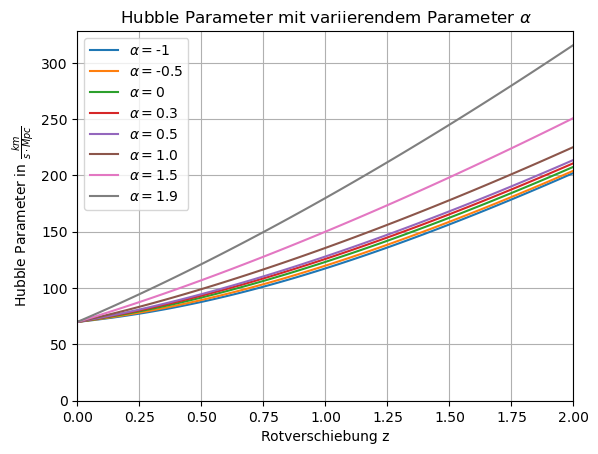

In [5]:
#########################################################################
##Plot des Hubble Parameters im DGP-Modell mit variierendem Parameter α##
#########################################################################

for alpha in [-1, -0.5, 0, 0.3, 0.5, 1.0, 1.5, 1.9]: #Plot
    hubble_parameter_werte = np.array([hubble_parameter_dgp(rotverschiebung, 0.3, 70, alpha) for rotverschiebung in np.linspace(0, 2, 100)])
    plt.plot(np.linspace(0, 2, 100), hubble_parameter_werte, label = r'$\alpha = $' + str(alpha))

#Anpassung der Darstellung
plt.xlim(0, 2)
plt.ylim(0)

#Beschriftung
plt.xlabel('Rotverschiebung z')
plt.ylabel(r'Hubble Parameter in $\frac{km}{s \cdot Mpc}$')
plt.title(r'Hubble Parameter mit variierendem Parameter $\alpha$')

plt.grid(True)

plt.legend()

plt.show()

# LEUCHTKRAFTDISTANZ IM DGP-MODELL

In [43]:
###############################################################
##Funktionen für die Berechnung der Leuchtkraft im DGP-Modell##
###############################################################

def integrand_dgp(rotverschiebung, omega_m0, h_0, alpha):
    return 1/hubble_parameter_dgp(rotverschiebung, omega_m0, h_0, alpha)

def leuchtkraftdistanz_dgp(rotverschiebung, omega_m0, h_0, alpha):
    c = 3e5 #Lichtgeschwindigkeit in km/s
    return c * (1 + rotverschiebung) * quad(integrand_dgp, 0, rotverschiebung, args = (omega_m0, h_0, alpha))[0]

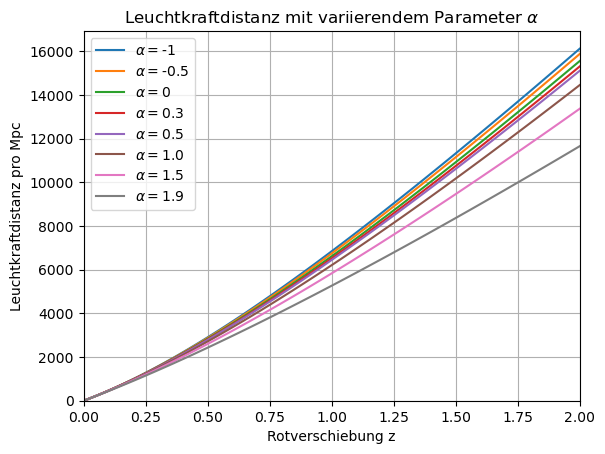

In [25]:
##########################################################################
##Plot der Leuchtkraftdistanz im DGP-Modell mit variierendem Parameter α##
##########################################################################

for alpha in [-1, -0.5, 0, 0.3, 0.5, 1.0, 1.5, 1.9]: #Plot
    d_L_dgp = np.array([leuchtkraftdistanz_dgp(rotverschiebung, 0.3, 70, alpha) for rotverschiebung in np.linspace(0, 2, 100)]) #y-Werte für den Plot
    plt.plot(np.linspace(0, 2, 100), d_L_dgp, label = r'$\alpha = $' + str(alpha))

#Anpassung der Darstellung
plt.xlim(0, 2)
plt.ylim(0)

#Beschriftung
plt.xlabel('Rotverschiebung z')
plt.ylabel(r'Leuchtkraftdistanz pro Mpc')
plt.title(r'Leuchtkraftdistanz mit variierendem Parameter $\alpha$')

plt.legend()

plt.grid(True)

plt.show()

# RELATIVE MAGNITUDE MIT VARIIERENDEM PARAMETER α IM DGP-MODELL

In [44]:
#########################################
##Funktion für die relativen Magnituden##
#########################################

@njit
def m_rel_theoretisch_dgp(leuchtkraftdistanz_dgp):
    return 5 * np.log10(leuchtkraftdistanz_dgp) + 25

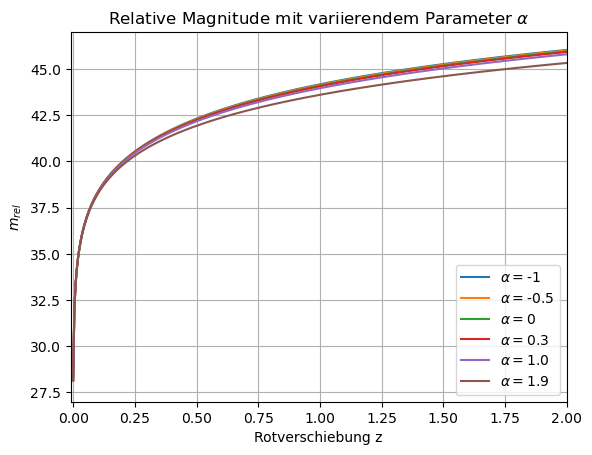

In [27]:
############################################################################
##Plot der theoretischen relativen Magnituden mit variierendem Parameter α##
############################################################################

for alpha in [-1, -0.5, 0, 0.3, 1.0, 1.9]: #Plot
    d_L_dgp = np.array([leuchtkraftdistanz_dgp(rotverschiebung, 0.3, 70, alpha) for rotverschiebung in np.linspace(0.001, 2, 400)])
    theoretischen_magnituden = np.array([m_rel_theoretisch_dgp(leuchtkraftdistanz) for leuchtkraftdistanz in d_L_dgp])
    plt.plot(np.linspace(0, 2, 400), theoretischen_magnituden, label = r'$\alpha = $' + str(alpha))

#Achsenanpassung
plt.xlim(-0.01, 2)
plt.ylim(27, 47)

#Beschriftung
plt.xlabel('Rotverschiebung z')
plt.ylabel(r'$m_{rel}$')
plt.title(r'Relative Magnitude mit variierendem Parameter $\alpha$')

#Position der Legende
plt.legend(loc='lower right')

plt.grid(True)

plt.show()

# VERGLEICH DER THEORETISCHEN WERTEN FÜR DIE RELATIVEN MAGNITUDEN MIT DEN SUPERNOVAE DATEN IM DGP-MODELL

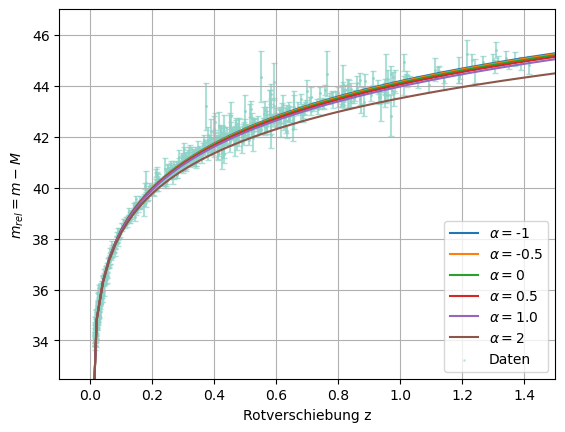

In [10]:
###############################################################################
##Plot zum Vergleich der theoretischen Werte mit den Werten aus der Datenbank##
###############################################################################

for alpha in [-1, -0.5, 0, 0.5, 1.0, 2]: #Plot der theoretischen Werte
    d_L_dgp = np.array([leuchtkraftdistanz_dgp(rotverschiebung, 0.3, 70, alpha) for rotverschiebung in np.linspace(0.001, 2, 100)])
    theoretischen_magnituden_dgp = np.array([m_rel_theoretisch_dgp(leuchtkraftdistanz) for leuchtkraftdistanz in d_L_dgp])
    plt.plot(np.linspace(0, 2, 100), theoretischen_magnituden_dgp, label = r'$\alpha = $' + str(alpha), zorder = 2)

#Datenpunkte
plt.scatter(rotverschiebungen_data, magnituden_data, s = 1, zorder = 1, label = r'Daten', alpha = 0.4, c = '#8dd3c7')

#Fehler der Datenpunkte
plt.errorbar(rotverschiebungen_data, magnituden_data, yerr = fehler_data, fmt = 'o', markersize = 1, capsize = 2, color = '#8dd3c7', linestyle = 'none', 
             zorder = 1, alpha = 0.7)

#Anpassung der Darstellung
plt.xlim(-0.1, 1.5)
plt.ylim(32.5,47)

#Achsenbeschriftung und Titel
plt.xlabel('Rotverschiebung z')
plt.ylabel(r'$m_{rel} = m - M$')
#plt.title(r'Theoretischen relativen Magnituden mit variierendem Parameter $\alpha$ im Vergleich mit Supernovae Daten')

plt.legend()

plt.grid(True)

plt.savefig('relative Magnituden DGP-Modell', dpi=300, bbox_inches='tight')

plt.show()

# PARAMETER BESTIMMUNG IM DGP-MODELL

In [174]:
####################################################################
##Modifizierte Leuchtkraftdistanz, in welcher das H nicht vorkommt##
####################################################################

#Modifizierte Leuchtkraftdistanz ist alte Leuchtkraftdistanz, in welcher H = 1 gesetzt wird.

In [45]:
#######################################################
##Analytische χ²-Funktion in welcher H nicht vorkommt##
#######################################################

@njit
def chi2_analytisch_dgp(theoretische_magnituden, magnituden, fehler):
    c_1 = 0
    f_0 = 0
    f_1 = 0
    for i in range(len(rotverschiebungen_data)):
        c_1 += 1/(fehler_data[i]**2)
        f_0 += (theoretische_magnituden[i] - magnituden[i]) / fehler[i]**2
        f_1 += ((theoretische_magnituden[i] - magnituden[i]) / fehler[i])**2
    return f_1 - (f_0 ** 2) / c_1

In [46]:
################################################
##Neue χ²-Funktion in welcher H nicht vorkommt##
################################################

def chi2_dgp(omega_m0, alpha):
    theoretische_magnituden_dgp = np.array([5 * np.log10(leuchtkraftdistanz_dgp(rotverschiebung, omega_m0, 1, alpha)) 
                                            for rotverschiebung in rotverschiebungen_data])
    chi2_wert_dgp = chi2_analytisch_dgp(theoretische_magnituden_dgp, magnituden_data, fehler_data)
    return chi2_wert_dgp

In [52]:
#########################################################
##Grobe Bestimmung des Minimum der χ²-Funktion Funktion##
#########################################################

#Startwerte
chi2_min_dgp = 1e30
omega_m0_min_dgp = 0
alpha_min = 1e4

for omega_m0 in np.linspace(0.2, 0.3, 100):
    for alpha in np.linspace(-12, 1.9, 100):
        chi2_wert = chi2_dgp(omega_m0, alpha)
        if chi2_wert < chi2_min_dgp:
            chi2_min_dgp = chi2_wert
            omega_m0_min_dgp = omega_m0
            alpha_min = alpha

C:\Users\Damian\AppData\Local\Temp\ipykernel_31604\1720867872.py:7: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  u_lösung = fsolve(hilfsfunktion, np.sqrt(omega_m0 * (1 + rotverschiebung)**3 + 1 - omega_m0), args = (rotverschiebung, omega_m0, alpha),


In [53]:
################################
##Ausgabe der gefundenen Werte##
################################

print('Ω_m0 = ' + str(omega_m0_min))
print('α = ' + str(alpha_min))
print('χ² = ' + str(chi2_neu_min))

Ω_m0 = 0.27738693467336684
α = -0.06565656565656397
χ² = 562.2267608689144


In [54]:
###################################################
##Bestimmung des Minimum der χ²-Funktion Funktion##
###################################################

def chi2_dgp_parameter(parameter):
    omega_m0, alpha = parameter
    return chi2_dgp(omega_m0, alpha)

#Minimum der Chi Quadrat Funktion
lösung = minimize(chi2_dgp_parameter, x0 = [0.27738693467336684, -0.06565656565656397], bounds = [(0.27, 0.29), (-1, 1)])

In [55]:
################################
##Ausgabe der gefundenen Werte##
################################

print('Ω_m0 =', lösung.x[0])
print('α =', lösung.x[1])
print('χ² =', lösung.fun)

Ω_m0 = 0.27889054870393043
α = -0.01674573520799778
χ² = 562.2262013554573


In [64]:
#########################################################################
##Werte für den Plot der Sigma Umgebungen / Fehler Umgebungen berechnen##
#########################################################################

#Leeres Array
chi2_werte_dgp_plot = np.empty((len(np.linspace(0, 1, 300)), len(np.linspace(-12, 1.9, 300))))

#Berechnung
for i, alpha in enumerate(tqdm(np.linspace(-12, 1.9, 300), desc = 'Fortschritt')):
    for j, omega_m0 in enumerate(np.linspace(0, 1, 300)):
        chi2_wert = chi2_dgp(omega_m0, alpha)
        chi2_werte_dgp[i, j] = chi2_wert

Fortschritt:  14%|█▍        | 42/300 [46:09<4:35:04, 63.97s/it]C:\Users\Damian\AppData\Local\Temp\ipykernel_32512\1720867872.py:7: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  u_lösung = fsolve(hilfsfunktion, np.sqrt(omega_m0 * (1 + rotverschiebung)**3 + 1 - omega_m0), args = (rotverschiebung, omega_m0, alpha),
Fortschritt: 100%|██████████| 300/300 [4:44:10<00:00, 56.83s/it]  


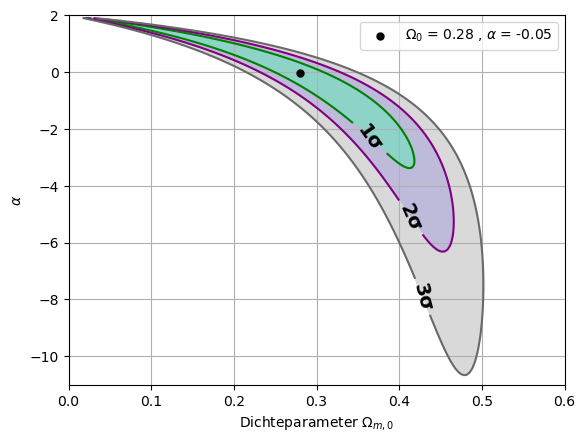

In [69]:
#################################################
##Plot der Sigma Umgebungen / Fehler Umgebungen##
#################################################

#Gitter erstellen
Omega_m0, Alpha = np.meshgrid(np.linspace(0, 1, 300), np.linspace(-12, 1.9, 300))

#Grenzen
Grenzen = [float(562.2325574504212 + 2.3), float(562.2325574504212 + 6.17), float(562.2325574504212 + 11.8)]

#Formatierung
contour_filled = plt.contourf(Omega_m0, Alpha, chi2_werte_dgp, levels = Grenzen, cmap = 'Set3', extend = 'min') #Innerer Bereich
contour_lines = plt.contour(Omega_m0, Alpha, chi2_werte_dgp, levels = Grenzen, colors = ['green', 'purple', 'dimgrey']) #Konturen
labels = {Grenzen[0]: '1σ', Grenzen[1]: '2σ', Grenzen[2]: '3σ'} #Beschriftung der Konturen
fmt = {level: label for level, label in labels.items()}  
contour_label = plt.clabel(contour_lines, fmt = fmt, inline = True, fontsize = 14, colors = 'black') #Schriftformatierung
for label in contour_label:
    label.set_fontweight('semibold')

#Gefundener Punkt
plt.scatter(0.28, -0.05, color = 'black', marker = '.', s = 100, label = r'$\Omega_0$ = 0.28 , $\alpha$ = -0.05', zorder = 2)

#Anpassung der Darstellung
plt.xlim(0, 0.6)
plt.ylim(-11,2)

#Achsenbeschriftung
plt.xlabel(r'Dichteparameter $\Omega_{m,0}$')
plt.ylabel(r'$\alpha$')

plt.grid(True)

plt.legend()

plt.savefig('Sigma_Umgebungen_DGP', dpi=300, bbox_inches='tight')

plt.show()

# FEHLERBESTIMMUNG VON Ω BEI α = -0.05

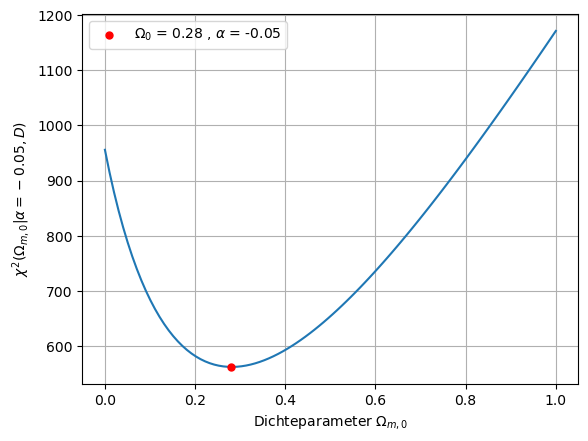

In [56]:
###########################################
##Plot χ²-Funktion bei festem Parameter α##
###########################################

chi2_werte_dgp = np.array([chi2_dgp(omega_m0, -0.05) for omega_m0 in np.linspace(0, 1, 100)]) #Berechnung der y-Werte für den Plot

plt.plot(np.linspace(0, 1, 100), chi2_werte_dgp) #Plot

#Gefundener Punkt
plt.scatter(0.28, chi2_neu_min, color = 'red', marker = '.', s = 100, label = r'$\Omega_0$ = 0.28 , $\alpha$ = -0.05', zorder = 2)

#Beschriftung
plt.xlabel(r'Dichteparameter $\Omega_{m,0}$')
plt.ylabel(r'$\chi^2(\Omega_{m,0} | \alpha = -0.05, D)$')

plt.legend()

plt.grid(True)

plt.show()

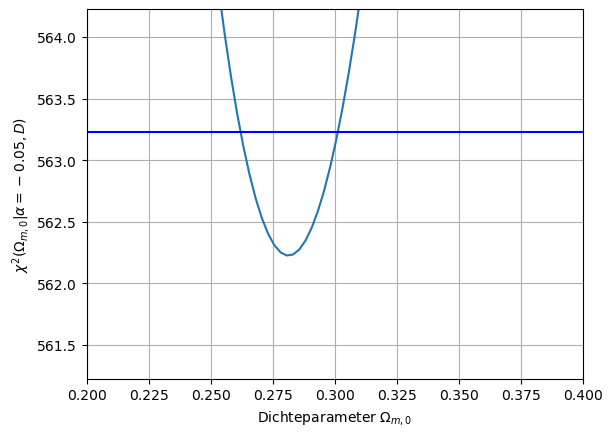

In [34]:
#############################################################################################################
##Plot der χ²-Funktion mit Gerade, welche um den Wert 1 nach oben verschoben wurde, um Grenzen abzuschätzen##
#############################################################################################################

chi2_werte_dgp = np.array([chi2_dgp(omega_m0, -0.05) for omega_m0 in np.linspace(0, 1, 400)]) #y-Werte berechnen
plt.plot(np.linspace(0, 1, 400), chi2_werte_dgp) #Plot der Funktion
plt.plot(np.linspace(0, 1, 400), np.full_like(np.linspace(0, 1, 400), chi2_neu_min + 1), color = 'blue') #Plot der Gerade

#Anpassung der Darstellung
plt.xlim(0.2, 0.4)
plt.ylim(chi2_neu_min - 1, chi2_neu_min + 2)

#Beschriftung
plt.xlabel(r'Dichteparameter $\Omega_{m,0}$')
plt.ylabel(r'$\chi^2(\Omega_{m,0} | \alpha = -0.05, D)$')

plt.grid(True)

plt.show()

In [37]:
####################
##Fehlerbestimmung##
####################

def delta_chi2_dgp(omega_m0):
    return chi2_dgp(omega_m0, -0.05) - (chi2_neu_min + 1)

omega_min = fsolve(delta_chi2_dgp, 0.26)[0]
omega_max = fsolve(delta_chi2_dgp, 0.3)[0]

print('Ω_m0_min = ' + str(omega_min))
print('Ω_m0_max = ' + str(omega_max))

print('\nΩ_m0_max - Ω_m0_best = ' + str(omega_max - 0.28) + ' | Oberer Fehler: 0.022')
print('Ω_m0_best - Ω_m0_min = ' + str(0.28 - omega_min) + ' | Unterer Fehler: 0.017')

Ω_m0_min = 0.2620363150649426
Ω_m0_max = 0.3012277214394001

Ω_m0_max - Ω_m0_best = 0.02122772143940005 | Oberer Fehler: 0.022
Ω_m0_best - Ω_m0_min = 0.0179636849350574 | Unterer Fehler: 0.017


# FEHLERBESTIMMUNG VON α BEI Ω = 0.28

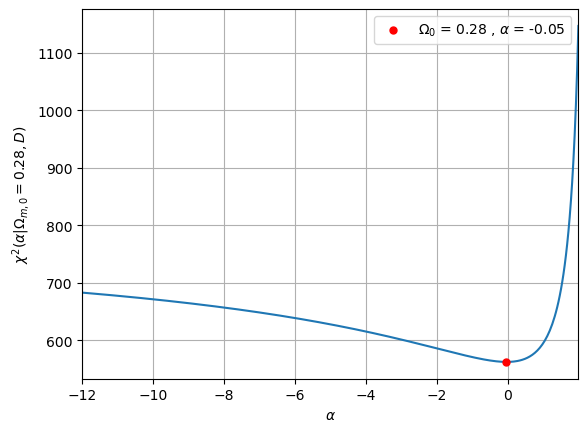

In [40]:
###########################################
##Plot χ²-Funktion bei festem Parameter Ω##
###########################################

chi2_werte_dgp = np.array([chi2_dgp(0.28, alpha) for alpha in np.linspace(-12, 1.99, 400)]) #Berechnung der y-Werte für den Plot

plt.plot(np.linspace(-12, 1.99, 400), chi2_werte_dgp) #Plot

#Gefundener Punkt
plt.scatter(-0.05, chi2_neu_min, color = 'red', marker = '.', s = 100, label = r'$\Omega_0$ = 0.28 , $\alpha$ = -0.05', zorder = 2)

#Beschriftung
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\chi^2(\alpha | \Omega_{m,0} = 0.28, D)$')

plt.xlim(-12, 1.99)

plt.legend()

plt.grid(True)

plt.show()

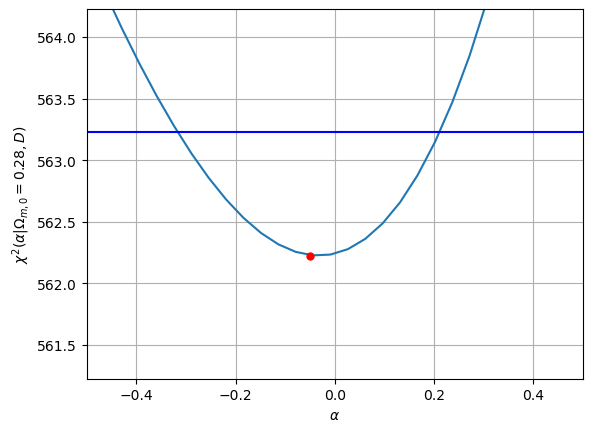

In [43]:
#############################################################################################################
##Plot der χ²-Funktion mit Gerade, welche um den Wert 1 nach oben verschoben wurde, um Grenzen abzuschätzen##
#############################################################################################################

chi2_werte_dgp = np.array([chi2_dgp(0.28, alpha) for alpha in np.linspace(-12, 1.99, 400)]) #y-Werte berechnen
plt.plot(np.linspace(-12, 1.99, 400), chi2_werte_dgp) #Plot der Funktion
plt.plot(np.linspace(-12, 1.99, 400), np.full_like(np.linspace(-12, 1.99, 400), chi2_neu_min + 1), color = 'blue') #Plot der Gerade

plt.scatter(-0.05, chi2_neu_min, color = 'red', marker = '.', s = 100, label = r'$\Omega_0$ = 0.28 , $\alpha$ = -0.05', zorder = 2)

#Anpassung der Darstellung
plt.xlim(-0.5, 0.5)
plt.ylim(chi2_neu_min - 1, chi2_neu_min + 2)

#Beschriftung
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\chi^2(\alpha | \Omega_{m,0} = 0.28, D)$')

plt.grid(True)

plt.show()

In [45]:
####################
##Fehlerbestimmung##
####################

def delta_chi2_dgp(alpha):
    return chi2_dgp(0.28, alpha) - (chi2_neu_min + 1)

alpha_min = fsolve(delta_chi2_dgp, -0.3)[0]
alpha_max = fsolve(delta_chi2_dgp, 0.2)[0]

print('α_min = ' + str(alpha_min))
print('α_max = ' + str(alpha_max))

print('\nα_max - α_best = ' + str(alpha_max + 0.05) + ' | Oberer Fehler: 0.27')
print('α_best - α_min = ' + str(-0.05 - alpha_min) + ' | Unterer Fehler: 0.26')

α_min = -0.3162404217082946
α_max = 0.2111459127222357

α_max - α_best = 0.2611459127222357 | Oberer Fehler: 0.27
α_best - α_min = 0.2662404217082946 | Unterer Fehler: 0.26


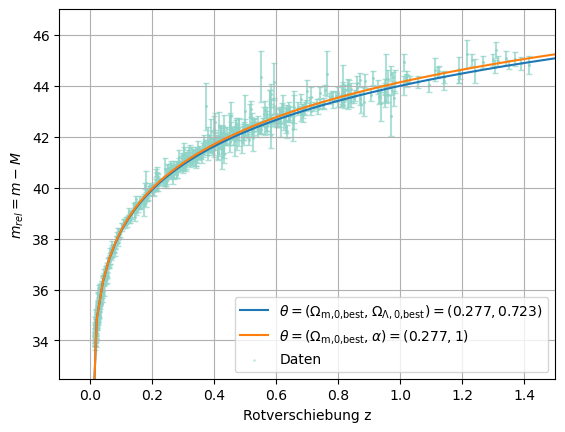

In [60]:
###############################################################################
##Plot zum Vergleich der theoretischen Werte mit den Werten aus der Datenbank##
###############################################################################

d_L_dgp = np.array([leuchtkraftdistanz_dgp(rotverschiebung, 0.277, 70, 1) for rotverschiebung in np.linspace(0.001, 2, 100)])
theoretischen_magnituden_dgp = np.array([m_rel_theoretisch_dgp(leuchtkraftdistanz) for leuchtkraftdistanz in d_L_dgp])
plt.plot(np.linspace(0, 2, 100), theoretischen_magnituden_dgp, 
         label = r'$\theta = (\Omega_\text{m,0,best}, \Omega_{\Lambda,\text{0,best}}) = (0.277, 0.723)$', zorder = 2)

d_L = np.array([leuchtkraftdistanz(rotverschiebung, 0.277, 70) for rotverschiebung in np.linspace(0.001, 2, 100)])
theoretischen_magnituden = np.array([m_rel_theoretisch(leuchtkraftdistanz) for leuchtkraftdistanz in d_L])
plt.plot(np.linspace(0, 2, 100), theoretischen_magnituden,
         label = r'$\theta = (\Omega_\text{m,0,best}, \alpha) = (0.277, 1)$', zorder = 2)

#Datenpunkte
plt.scatter(rotverschiebungen_data, magnituden_data, s = 1, zorder = 1, label = r'Daten', alpha = 0.4, c = '#8dd3c7')

#Fehler der Datenpunkte
plt.errorbar(rotverschiebungen_data, magnituden_data, yerr = fehler_data, fmt = 'o', markersize = 1, capsize = 2, color = '#8dd3c7', linestyle = 'none', 
             zorder = 1, alpha = 0.7)

#Anpassung der Darstellung
plt.xlim(-0.1, 1.5)
plt.ylim(32.5,47)

#Achsenbeschriftung und Titel
plt.xlabel('Rotverschiebung z')
plt.ylabel(r'$m_{rel} = m - M$')
#plt.title(r'Theoretischen relativen Magnituden mit variierendem Parameter $\alpha$ im Vergleich mit Supernovae Daten')

plt.legend()

plt.grid(True)

plt.savefig('LambdaCDM gegen DGP', dpi=300, bbox_inches='tight')

plt.show()